In [1]:
import matplotlib.pyplot as plt
plt.style.use(['classic'])
plt.rcParams['figure.facecolor'] = 'white'

import numpy as np
import math
import tensorflow as tf

from functions import *

## Visualizing Generalized Gamma Function

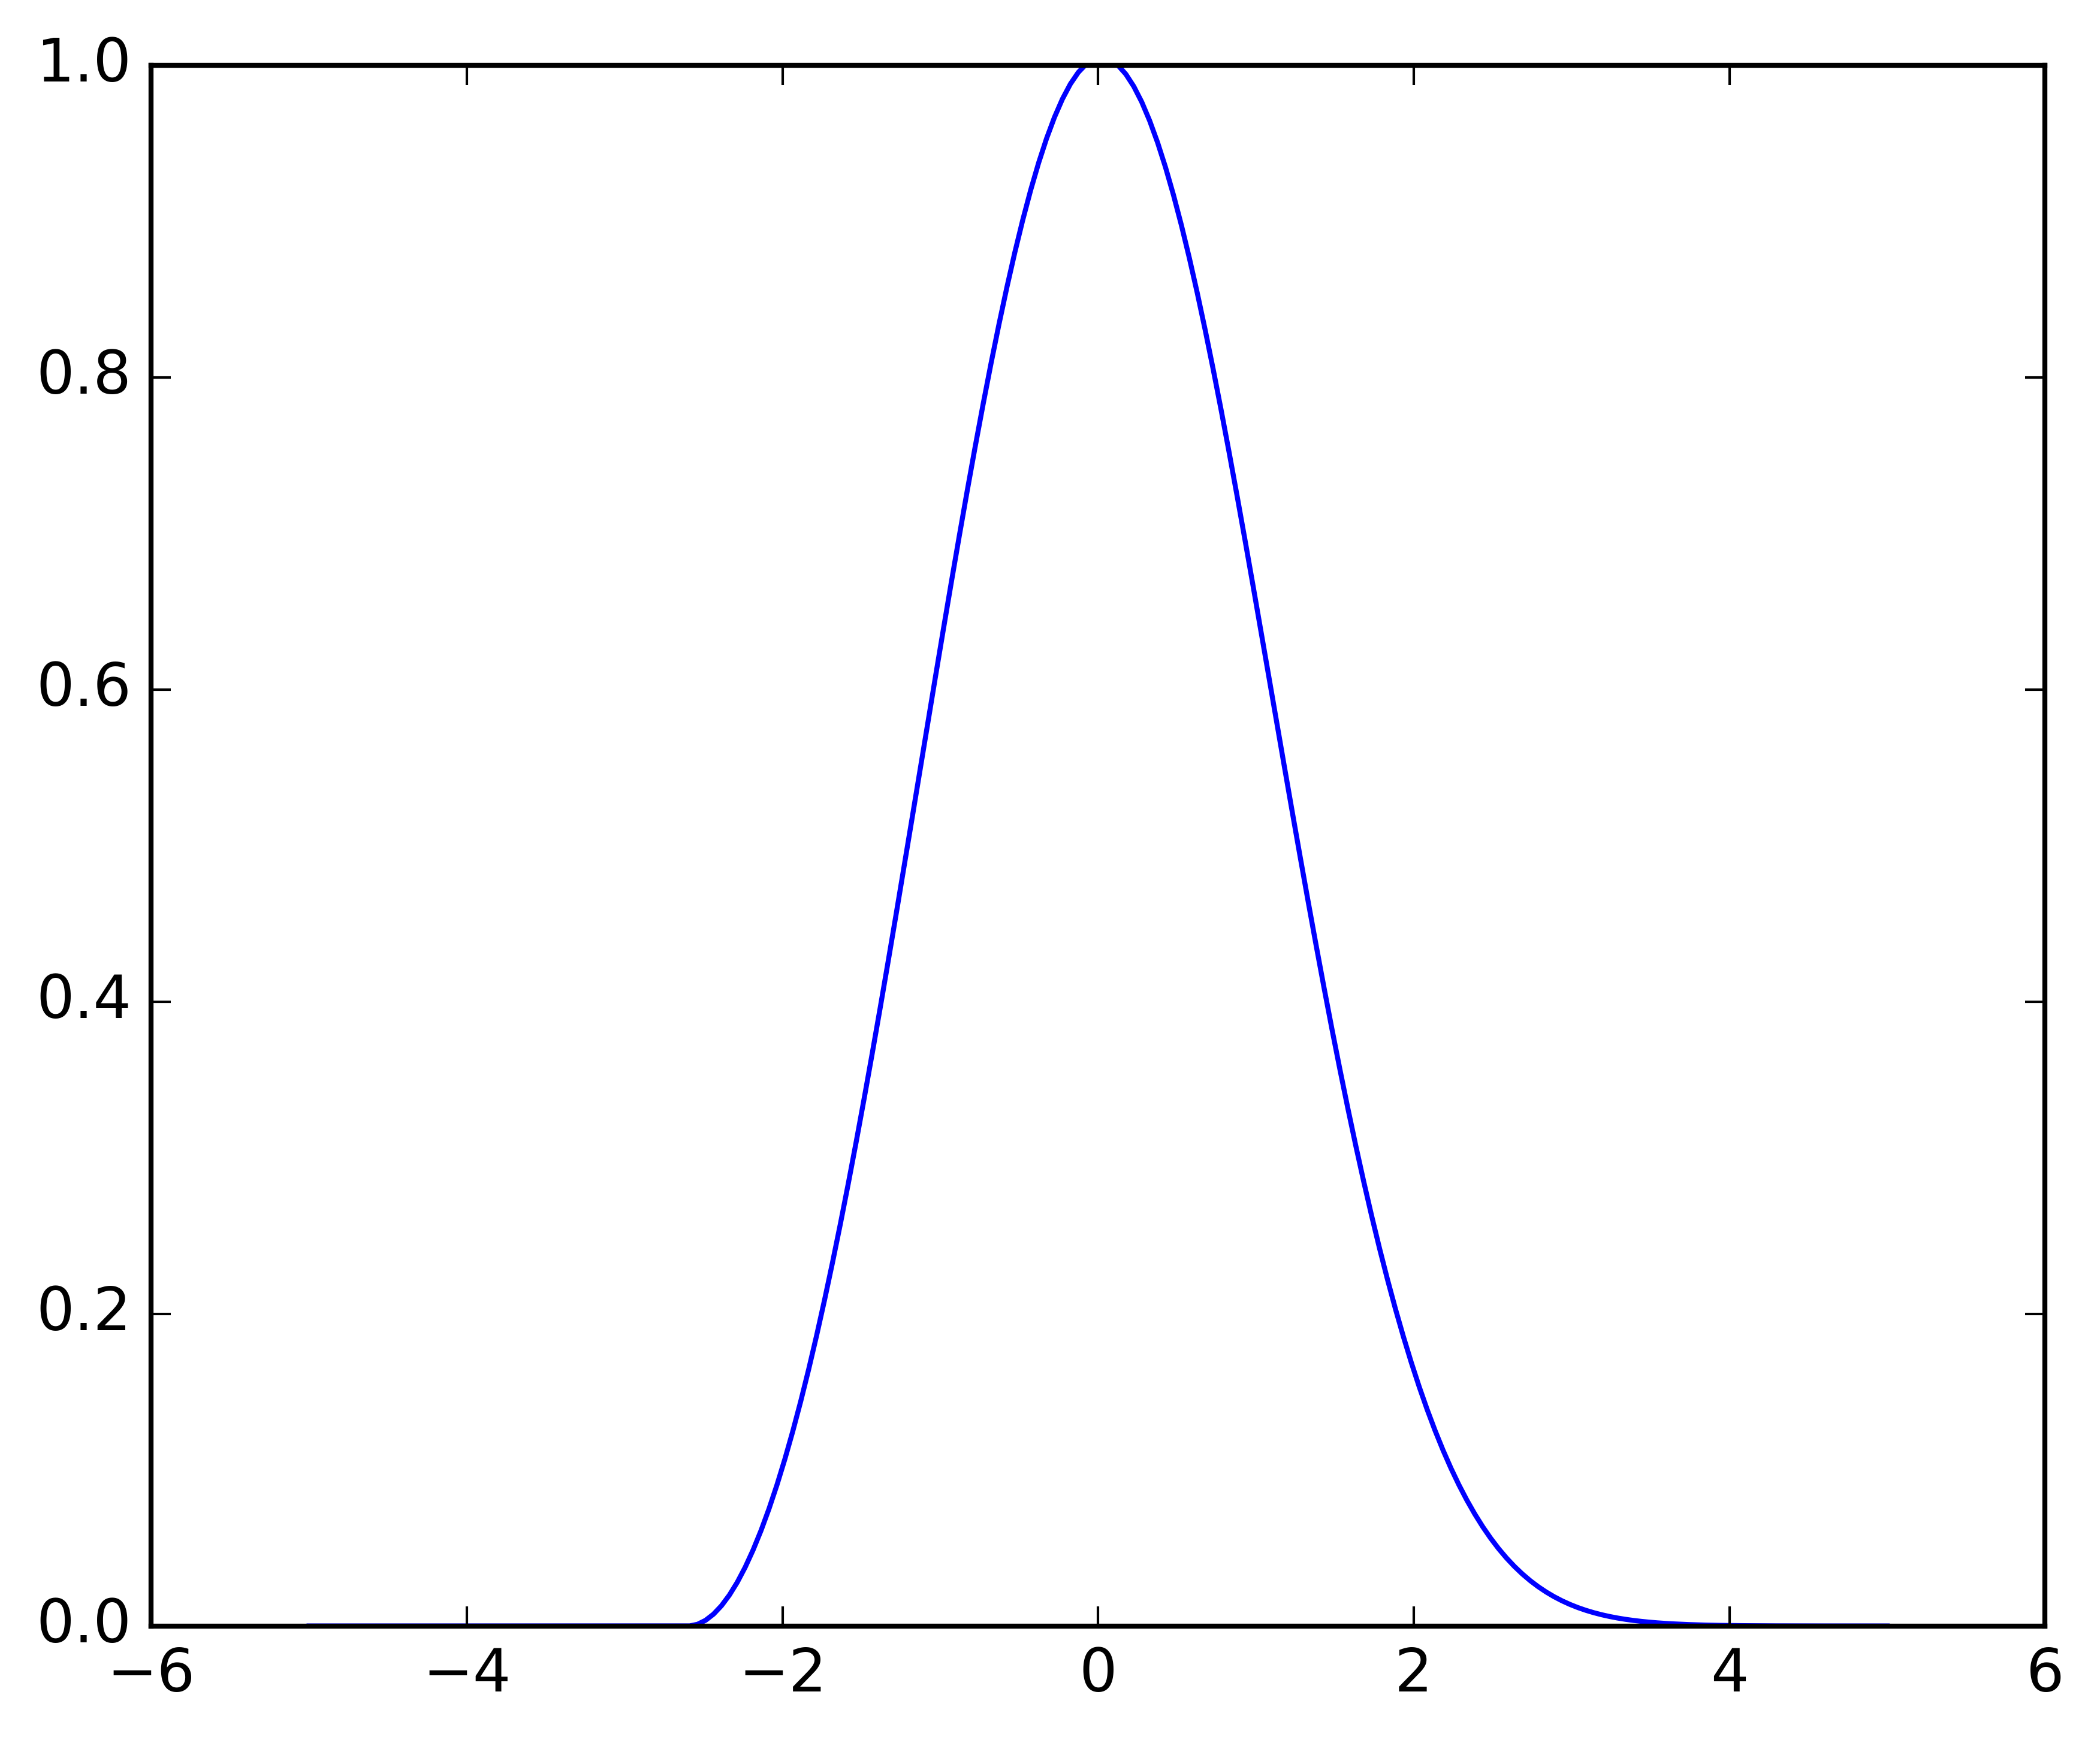

In [2]:
x = np.linspace(-5, 5, 200)
    
plt.figure(figsize=(6,5), dpi=600)
plt.plot(x, generalized_gamma(x))

axes = plt.gca()
axes.set_ylim([0, 1])
plt.tight_layout()
plt.show()

In [3]:
generalized_gamma(np.linspace(-5, 5, 10)) # checking values are valid for E < 0 

<tf.Tensor: shape=(10,), dtype=float64, numpy=
array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.40817893e-01,
       8.67746676e-01, 8.85991687e-01, 2.92087464e-01, 2.59557671e-02,
       4.83403752e-04, 1.43020908e-06])>

In [4]:
tent_delta = 1

def tent_activation(x):
    return tf.math.maximum(0, tent_delta-tf.math.abs(x))

# copied to functions.py

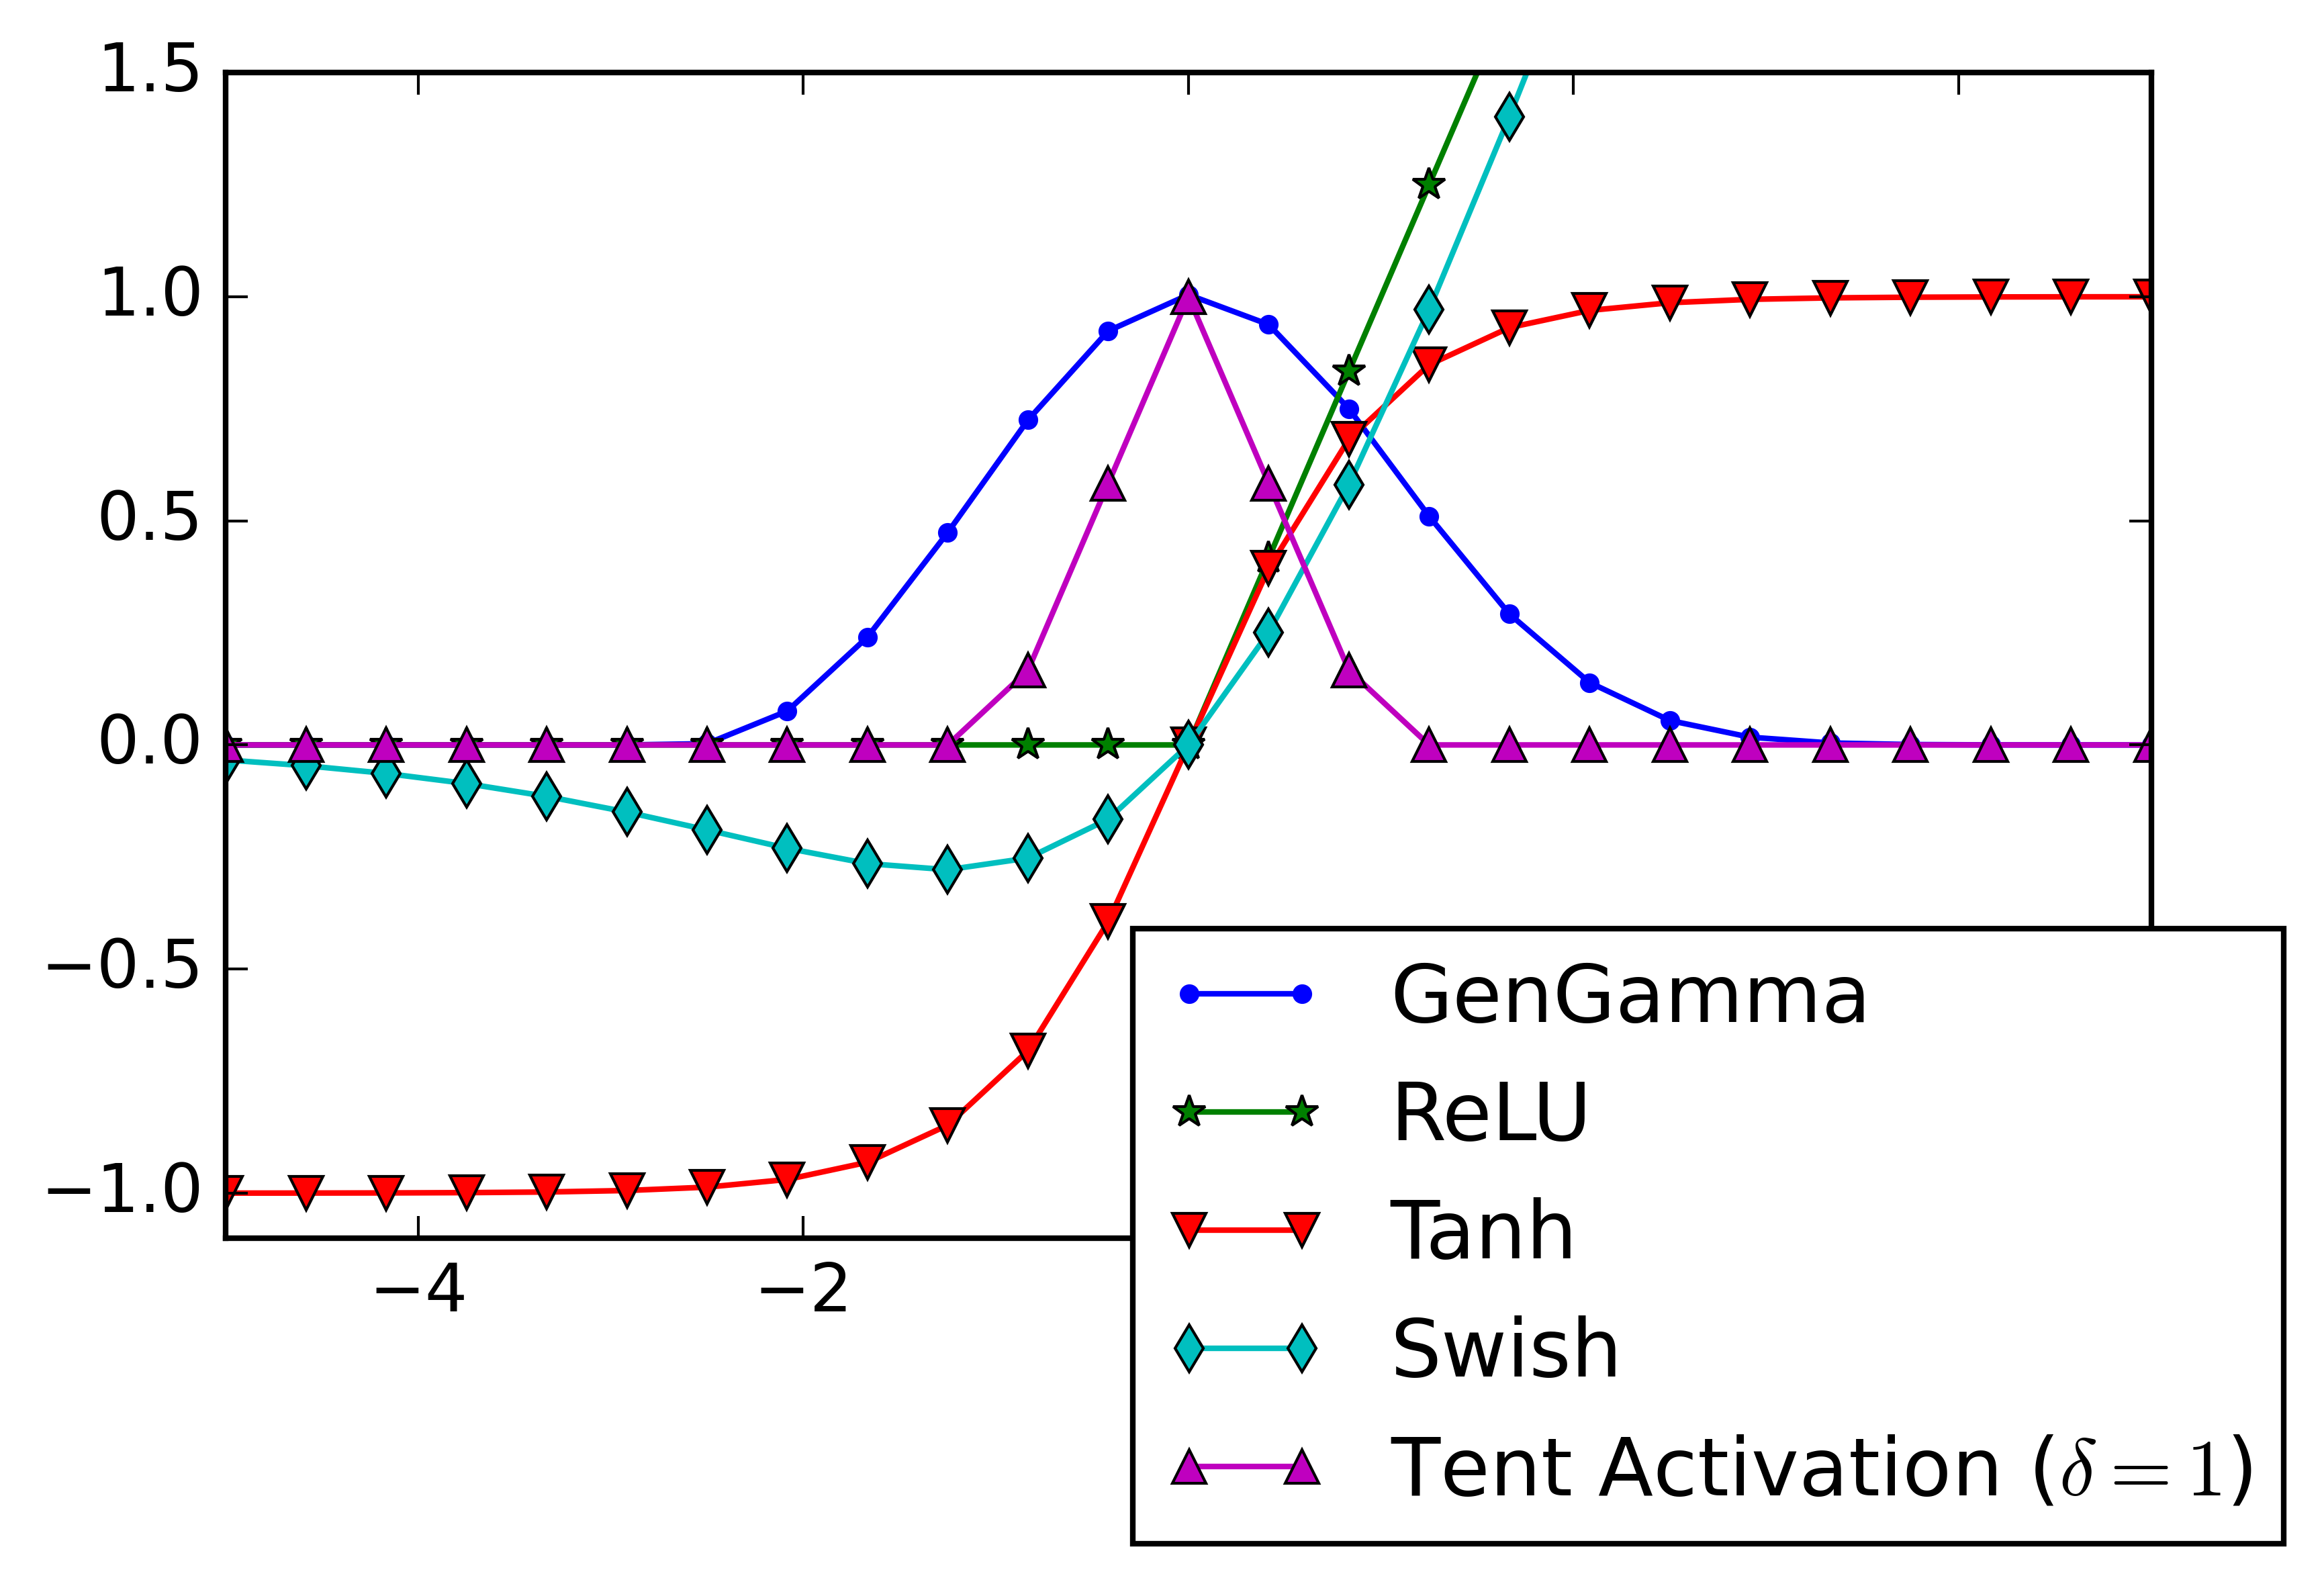

In [5]:
x = np.linspace(-5, 5, 25)

plt.figure(figsize=(6,4), dpi=600)

plt.plot(x, generalized_gamma(x), label='GenGamma', marker='.')
plt.plot(x, tf.nn.relu(x), label='ReLU', marker='*')
plt.plot(x, tf.nn.tanh(x), label = 'Tanh', marker='v')
plt.plot(x, tf.keras.activations.swish(x), label = 'Swish', marker='d')
plt.plot(x, tent_activation(x), label = "Tent Activation ($\delta="+str(tent_delta)+"$)", marker='^')

plt.legend(loc='best', bbox_to_anchor=(0.45, 0., 0., 0.3))
axes = plt.gca()
axes.set_ylim([-1.1, 1.5])
axes.set_xlim([-5, 5])
plt.tight_layout()
plt.savefig('images/comparing-activation-functions.png')
plt.show()

## First Derivative Comparison

In [6]:
point_count = 40
x = np.linspace(-5, 5, point_count)

def deriving_activation(activation=None):
    x = tf.Variable(np.linspace(-5, 5, point_count), name='x')

    with tf.GradientTape(persistent=True) as tape: 
        y = tf.constant(activation(x), dtype='float64')

    dy_dx = tape.gradient(y, x)
    return np.array(dy_dx)

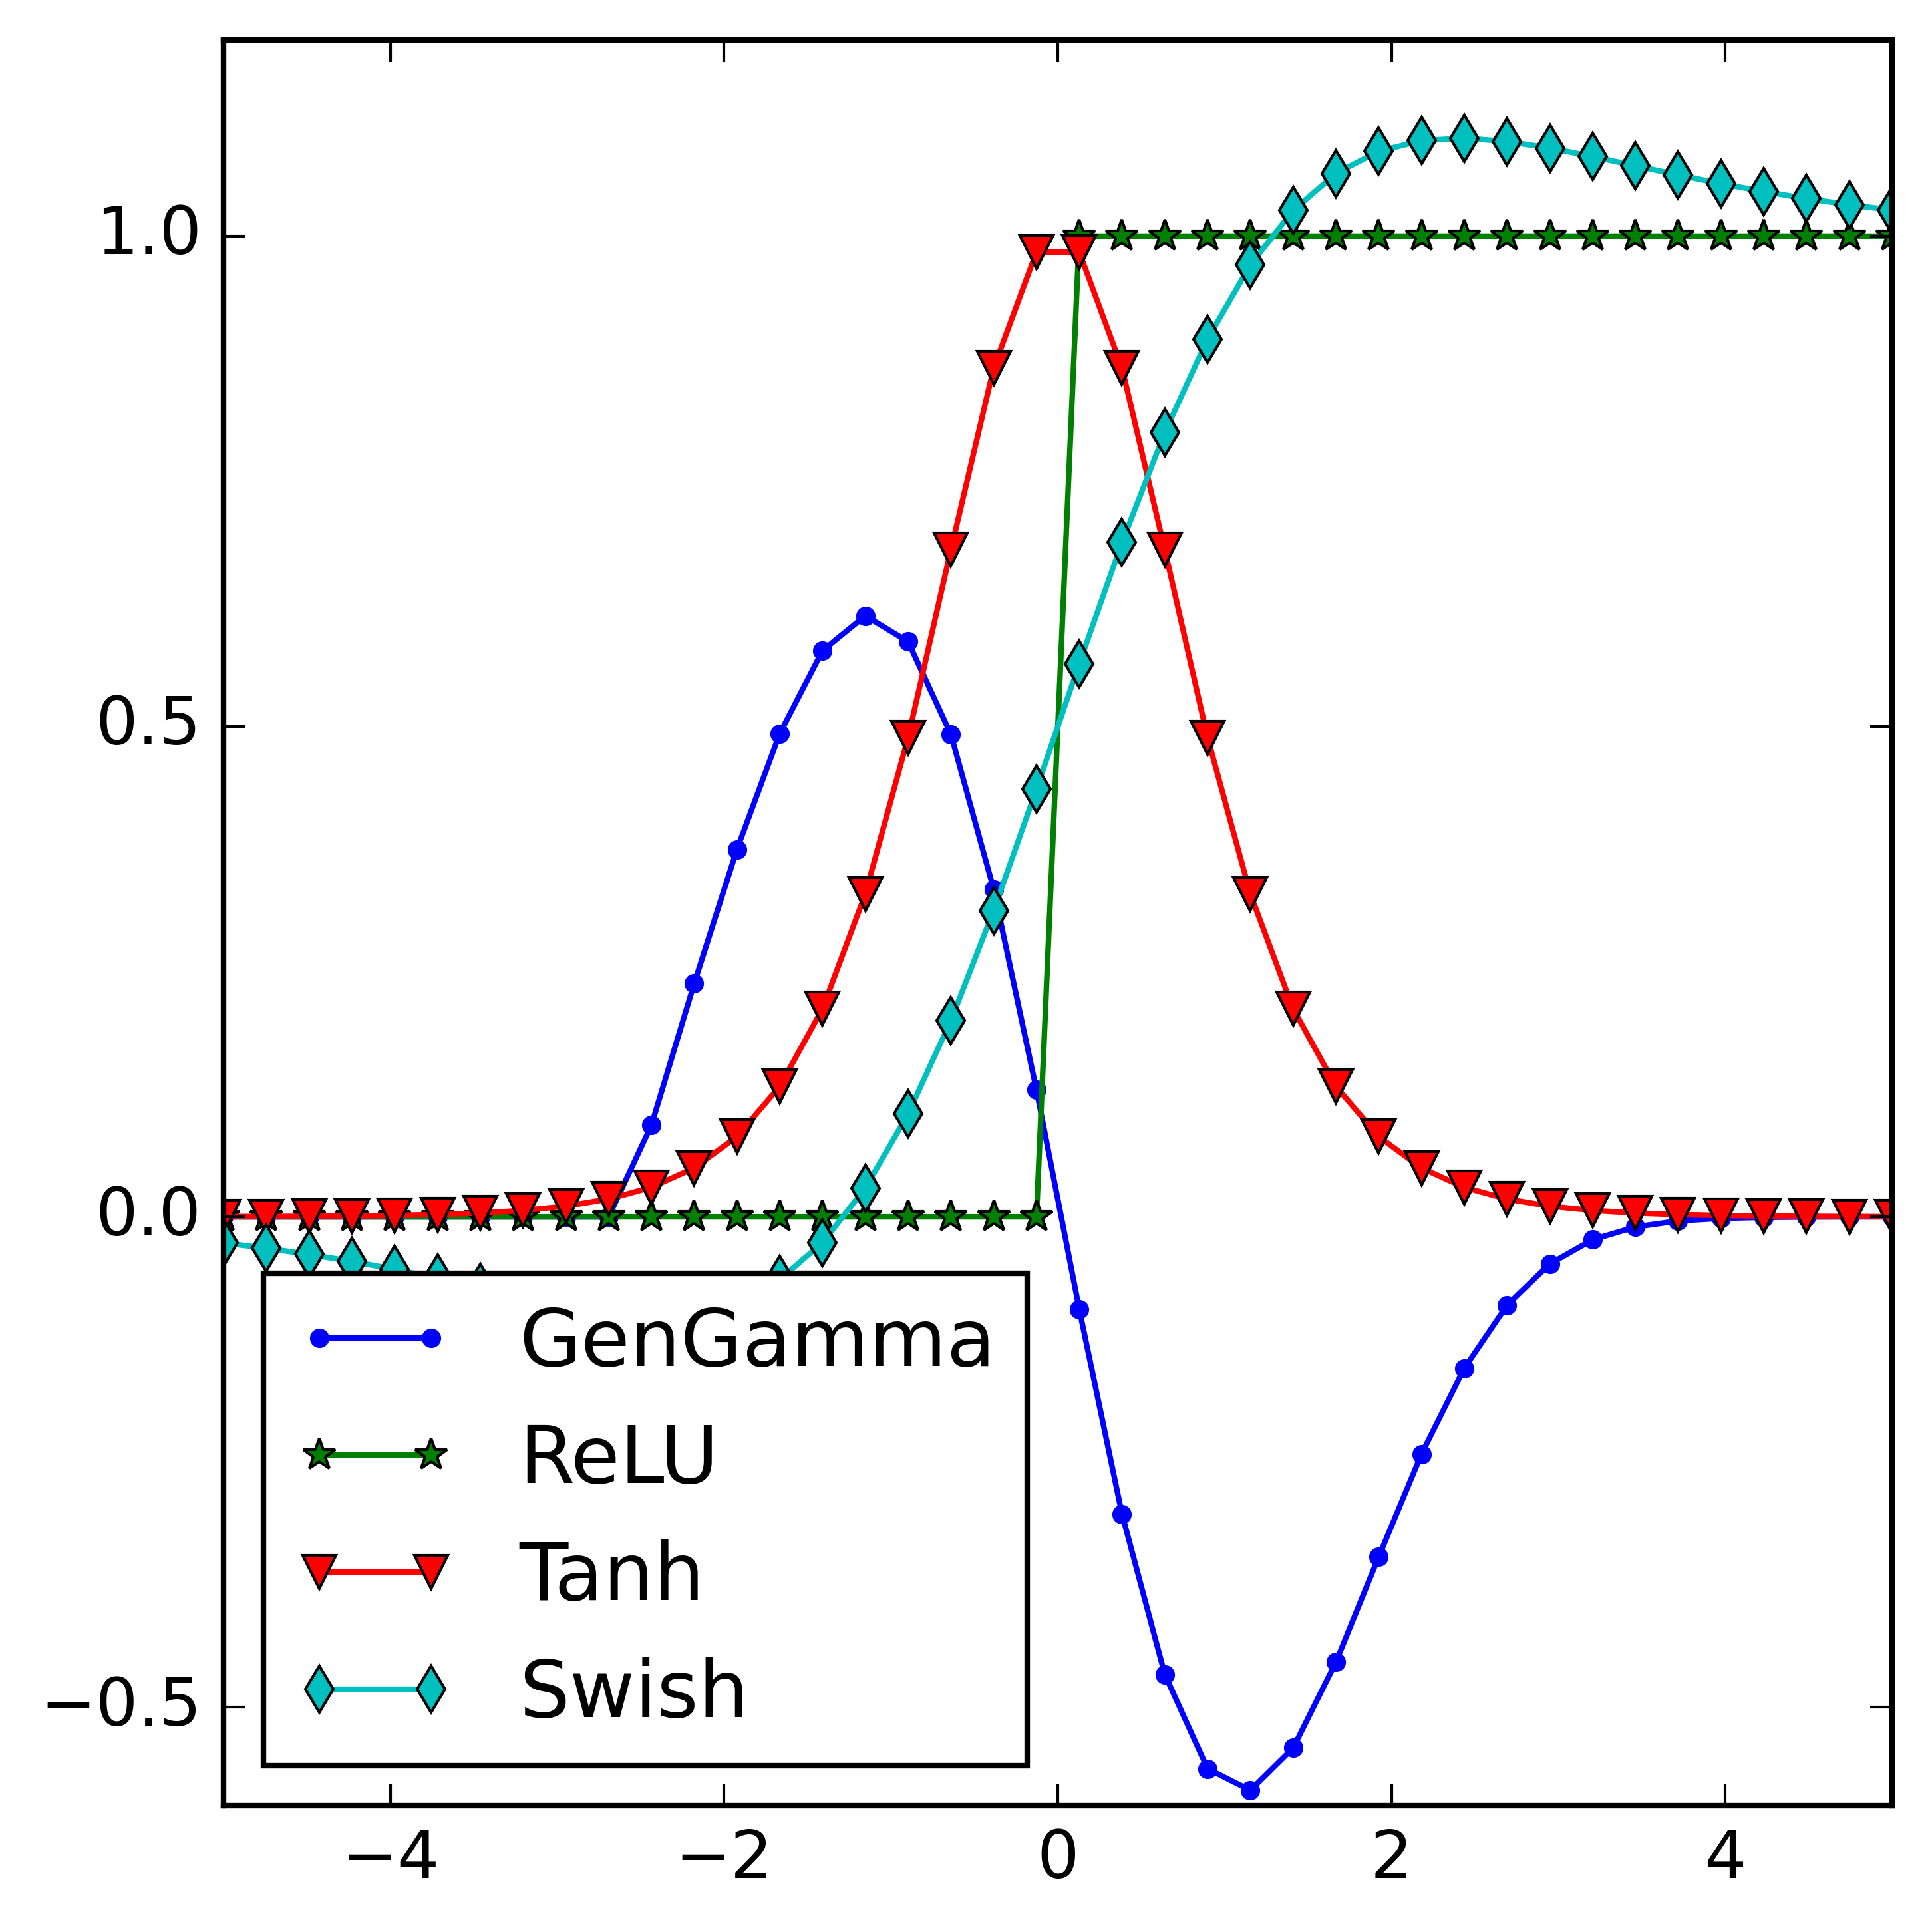

In [7]:
plt.figure(figsize=(5,5), dpi=600)

plt.plot(x, deriving_activation(generalized_gamma), label='GenGamma', marker='.')
plt.plot(x, deriving_activation(tf.nn.relu), label='ReLU', marker='*')

plt.plot(x, deriving_activation(tf.nn.tanh), label = 'Tanh', marker='v')
plt.plot(x, deriving_activation(tf.keras.activations.swish), label = 'Swish', marker='d')

plt.legend(loc='lower left')
axes = plt.gca()

axes.set_xlim([-5, 5])

plt.tight_layout()
plt.savefig('images/comparing-first-derivatives.png')
plt.show()

## Second Derivative Comparison

In [8]:
from numpy import diff

def deriving2nd_activation(y):
    dx = 0.1
    dy = diff(y)/dx
    return dy


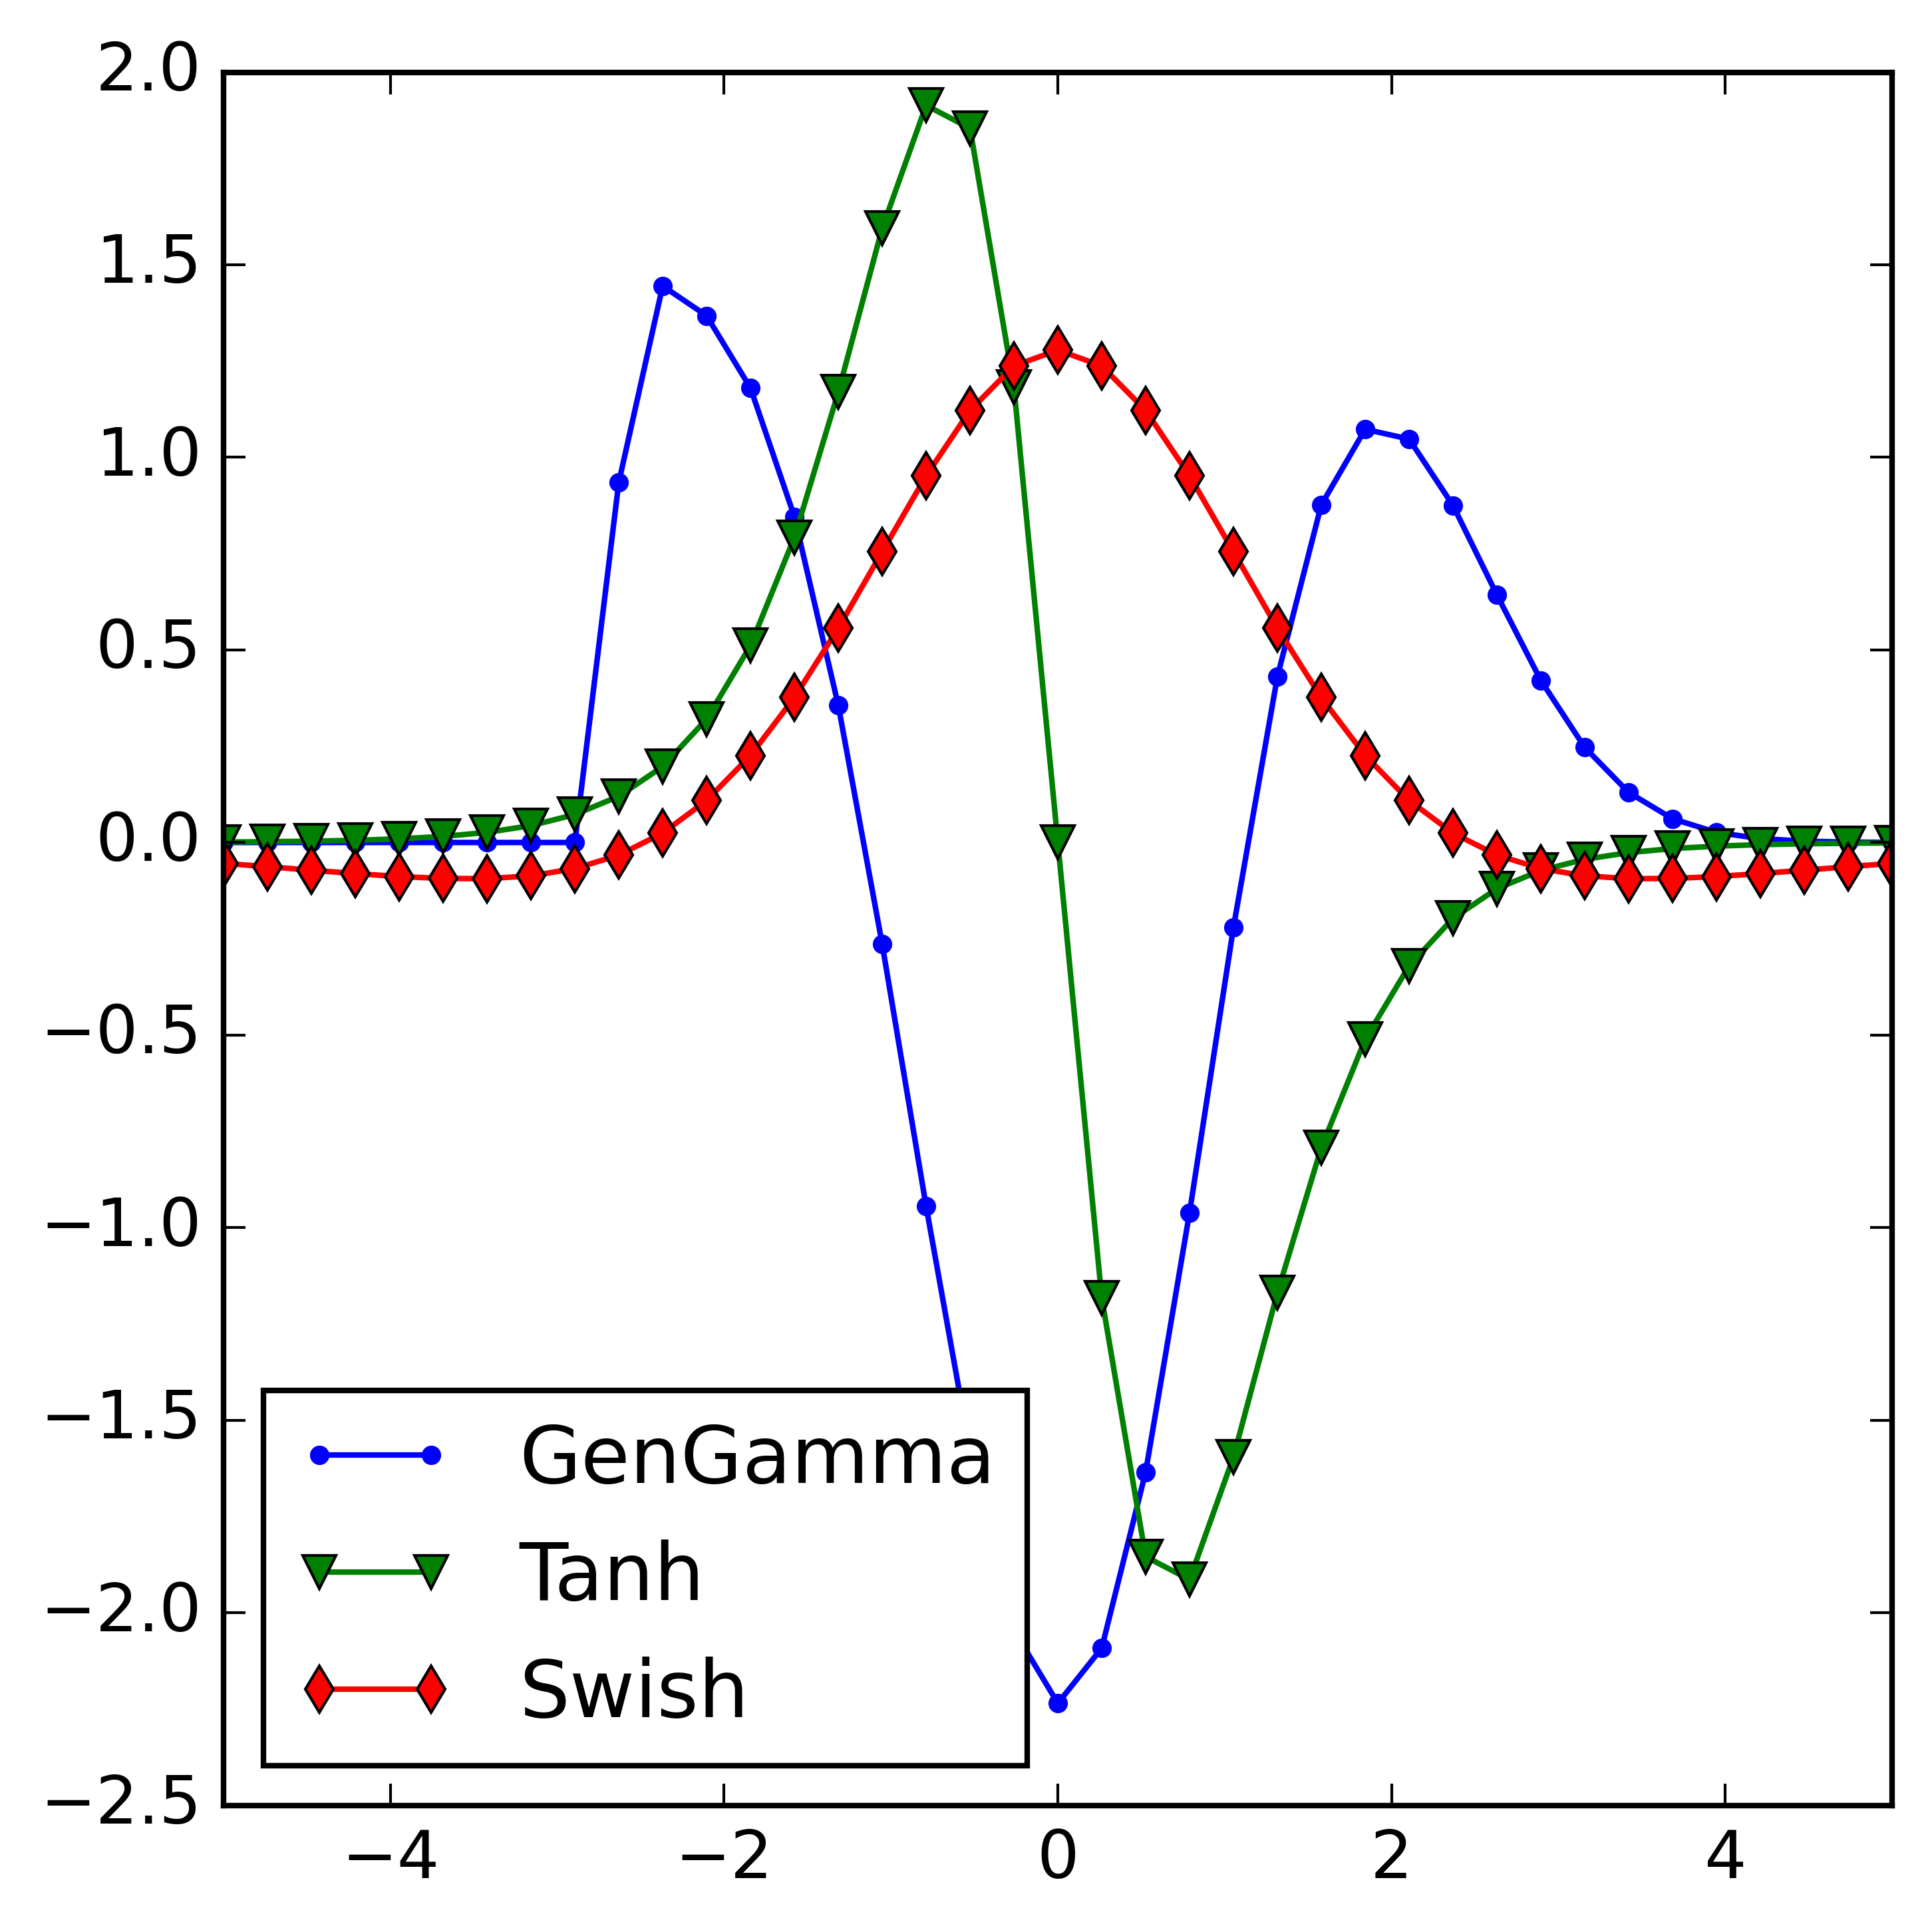

In [9]:
x = np.linspace(-5, 5, point_count-1)

plt.figure(figsize=(5,5), dpi=600)

plt.plot(x, deriving2nd_activation(deriving_activation(generalized_gamma)), label='GenGamma', marker='.')
plt.plot(x, deriving2nd_activation(deriving_activation(tf.nn.tanh)), label = 'Tanh', marker='v')
plt.plot(x, deriving2nd_activation(deriving_activation(tf.keras.activations.swish)), label = 'Swish', marker='d')

plt.legend(loc='lower left')
axes = plt.gca()

axes.set_xlim([-5, 5])

plt.tight_layout()
plt.savefig('images/comparing-curvature.png')
plt.show()

In [10]:
max(deriving2nd_activation(deriving_activation(generalized_gamma)))

1.4449485456854683

In [11]:
max(deriving2nd_activation(deriving_activation(tf.keras.activations.swish)))

1.2785478374939652

In [12]:
max(deriving2nd_activation(deriving_activation(tf.nn.tanh)))

1.9139178492600406